# Gradio Tools

There are many 1000s of Gradio apps on Hugging Face Spaces. This library puts them at the tips of your LLM's fingers 🦾

Specifically, gradio-tools is a Python library for converting Gradio apps into tools that can be leveraged by a large language model (LLM)-based agent to complete its task. For example, an LLM could use a Gradio tool to transcribe a voice recording it finds online and then summarize it for you. Or it could use a different Gradio tool to apply OCR to a document on your Google Drive and then answer questions about it.

It's very easy to create you own tool if you want to use a space that's not one of the pre-built tools. Please see this section of the gradio-tools documentation for information on how to do that. All contributions are welcome!

In [ ]:
# !pip install gradio_tools

## Using a tool

In [3]:
from gradio_tools.tools import StableDiffusionTool

In [4]:
local_file_path = StableDiffusionTool().langchain.run(
    "Please create a photo of a dog riding a skateboard"
)
local_file_path

Loaded as API: https://gradio-client-demos-stable-diffusion.hf.space ✔

Job Status: Status.STARTING eta: None


'/Users/harrisonchase/workplace/langchain/docs/modules/agents/tools/integrations/b61c1dd9-47e2-46f1-a47c-20d27640993d/tmp4ap48vnm.jpg'

In [6]:
from PIL import Image

In [9]:
im = Image.open(local_file_path)

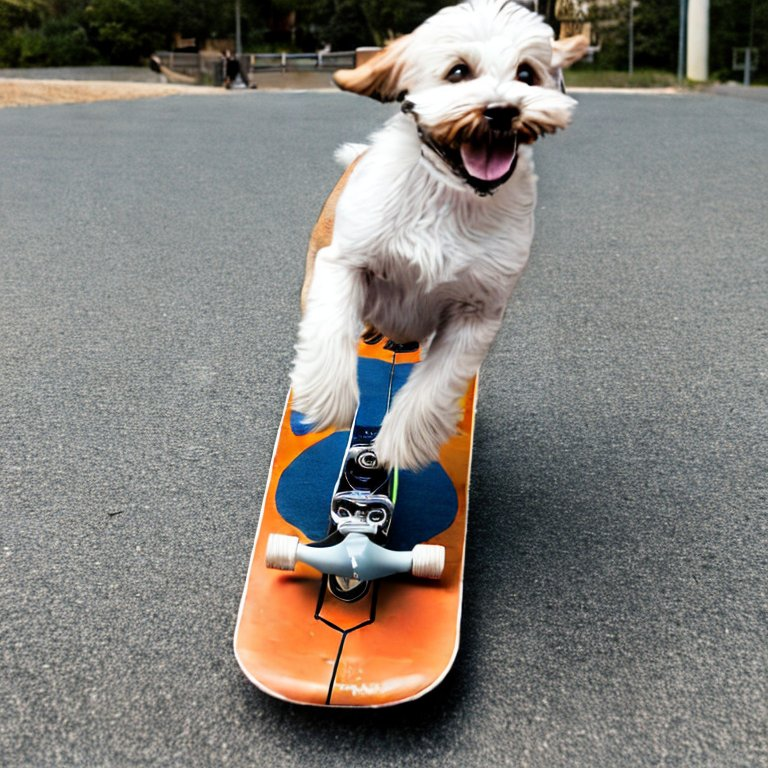

In [13]:
display(im)

## Using within an agent

In [14]:
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
from gradio_tools.tools import (
    StableDiffusionTool,
    ImageCaptioningTool,
    StableDiffusionPromptGeneratorTool,
    TextToVideoTool,
)

from langchain.memory import ConversationBufferMemory

llm = OpenAI(temperature=0)
memory = ConversationBufferMemory(memory_key="chat_history")
tools = [
    StableDiffusionTool().langchain,
    ImageCaptioningTool().langchain,
    StableDiffusionPromptGeneratorTool().langchain,
    TextToVideoTool().langchain,
]


agent = initialize_agent(
    tools, llm, memory=memory, agent="conversational-react-description", verbose=True
)
output = agent.run(
    input=(
        "Please create a photo of a dog riding a skateboard "
        "but improve my prompt prior to using an image generator."
        "Please caption the generated image and create a video for it using the improved prompt."
    )
)

Loaded as API: https://gradio-client-demos-stable-diffusion.hf.space ✔
Loaded as API: https://taesiri-blip-2.hf.space ✔
Loaded as API: https://microsoft-promptist.hf.space ✔
Loaded as API: https://damo-vilab-modelscope-text-to-video-synthesis.hf.space ✔


> Entering new AgentExecutor chain...

Thought: Do I need to use a tool? Yes
Action: StableDiffusionPromptGenerator
Action Input: A dog riding a skateboard
Job Status: Status.STARTING eta: None

Observation: A dog riding a skateboard, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha
Thought: Do I need to use a tool? Yes
Action: StableDiffusion
Action Input: A dog riding a skateboard, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha
Job Status: Status.STARTING eta: None

Job Status: Status.PROCESSING eta: None

Observation: /Users/harrisonchase/workplace/langchain/docs/modul